In [330]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns

First, I have loaded the data to pandas and checked the null values in the columns.

In [331]:
cancer_df=pd.read_csv('cancer_dataset.csv')
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327066 entries, 0 to 327065
Data columns (total 12 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Age_Group                                     327066 non-null  object 
 1   Lower_Confidence_Interval                     166000 non-null  float64
 2   Upper_Confidence_Interval                     166263 non-null  float64
 3   Count_of_People_Diagnosed_With_Cancer         166186 non-null  float64
 4   Cancer_Event_Type                             327066 non-null  object 
 5   Population_in_Census_Division                 322734 non-null  float64
 6   Cancer_Frequency_Based_on_Race_And_Ethnicity  327066 non-null  object 
 7   Disease_Frequency                             166186 non-null  float64
 8   Gender                                        327066 non-null  object 
 9   Cancer_Organ_Site                             32

In [332]:
cancer_df.head(31)

,Age_Group,Lower_Confidence_Interval,Upper_Confidence_Interval,Count_of_People_Diagnosed_With_Cancer,Cancer_Event_Type,Population_in_Census_Division,Cancer_Frequency_Based_on_Race_And_Ethnicity,Disease_Frequency,Gender,Cancer_Organ_Site,Data_Collection_Starting_Year,Data_Collection_Ending_Year
0,1-4,2.2,2.9,191.0,Mortality,7493614.0,All Races,2.5,Female,All Cancer Sites Combined,1999,NaN
1,10-14,2.0,2.6,227.0,Mortality,9855664.0,All Races,2.3,Female,All Cancer Sites Combined,1999,NaN
2,15-19,2.7,3.4,297.0,Mortality,9761569.0,All Races,3.0,Female,All Cancer Sites Combined,1999,NaN
3,20-24,4.0,4.9,404.0,Mortality,9098615.0,All Races,4.4,Female,All Cancer Sites Combined,1999,NaN
4,25-29,6.4,7.5,674.0,Mortality,9695967.0,All Races,7.0,Female,All Cancer Sites Combined,1999,NaN
5,30-34,12.7,14.1,1372.0,Mortality,10249123.0,All Races,13.4,Female,All Cancer Sites Combined,1999,NaN
6,35-39,27.8,29.7,3297.0,Mortality,11474154.0,All Races,28.7,Female,All Cancer Sites Combined,1999,NaN
7,40-44,51.9,54.6,5964.0,Mortality,11195450.0,All Races,53.3,Female,All Cancer Sites Combined,1999,NaN
8,45-49,90.8,94.6,9261.0,Mortality,9987734.0,All Races,92.7,Female,All Cancer Sites Combined,1999,NaN
9,5-9,2.0,2.6,230.0,Mortality,10052618.0,All Races,2.3,Female,All Cancer Sites Combined,1999,NaN


In [333]:
# Now I want to group the data according to their ethnicity
# I first look at the unique names of the ethnicities on the data
print(cancer_df['Cancer_Frequency_Based_on_Race_And_Ethnicity'].unique())
# I will look at separating the data set by ethnicities
all_races=cancer_df[cancer_df['Cancer_Frequency_Based_on_Race_And_Ethnicity']=='All Races']
american_indian=cancer_df[cancer_df['Cancer_Frequency_Based_on_Race_And_Ethnicity']=='American Indian/Alaska Native']
asian_islander=cancer_df[cancer_df['Cancer_Frequency_Based_on_Race_And_Ethnicity']=='Asian/Pacific Islander']
black=cancer_df[cancer_df['Cancer_Frequency_Based_on_Race_And_Ethnicity']=='Black']
hispanic=cancer_df[cancer_df['Cancer_Frequency_Based_on_Race_And_Ethnicity']=='Hispanic']
white=cancer_df[cancer_df['Cancer_Frequency_Based_on_Race_And_Ethnicity']=='White']


['All Races' 'American Indian/Alaska Native' 'Asian/Pacific Islander'
 'Black' 'Hispanic' 'White']


In [334]:
# I am not interested in some columns so I have deleted them
asian_islander=asian_islander.drop(columns=['Lower_Confidence_Interval','Upper_Confidence_Interval','Cancer_Frequency_Based_on_Race_And_Ethnicity','Data_Collection_Starting_Year','Data_Collection_Ending_Year'],axis=1)

In [335]:
# Now I have 6 columns
print(asian_islander.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54511 entries, 38 to 327008
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age_Group                              54511 non-null  object 
 1   Count_of_People_Diagnosed_With_Cancer  21051 non-null  float64
 2   Cancer_Event_Type                      54511 non-null  object 
 3   Population_in_Census_Division          53789 non-null  float64
 4   Disease_Frequency                      21051 non-null  float64
 5   Gender                                 54511 non-null  object 
 6   Cancer_Organ_Site                      54511 non-null  object 
dtypes: float64(3), object(4)
memory usage: 3.3+ MB
None


In [347]:
#I want to group the asian_islander dataset by age group
asian_islander_by_age=asian_islander.groupby(['Age_Group']).mean()
#Looks like the pandas has just included the float64 columns, which makes sense because of the arithmetic I used
asian_islander_by_age.index

Index(['1-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '5-9', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80-84', '85+', '<1'],
      dtype='object', name='Age_Group')

In [353]:
#reindexing as some age groups are not in the right order
new_index=['<1','1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80-84', '85+']
asian_islander_by_age=asian_islander_by_age.reindex(new_index)

In [354]:
# By using the nunique method, I can see that there should be 19 counts of age groups
df = pd.DataFrame(asian_islander_by_age, columns=['Count_of_People_Diagnosed_With_Cancer','Population_in_Census_Division','Disease_Frequency'])

In [338]:
#exploring the columns that are object types
asian_islander['Gender'].unique()
#looks like there are male and female occurences per row

array(['Female', 'Male', 'Male and Female'], dtype=object)

In [339]:
asian_islander['Cancer_Organ_Site'].unique()

array(['All Cancer Sites Combined', 'Brain and Other Nervous System',
       'Cervix', 'Colon and Rectum', 'Corpus and Uterus, NOS',
       'Esophagus', 'Female Breast', 'Female Breast, <i>in situ</i>',
       'Hodgkin Lymphoma', 'Kaposi Sarcoma', 'Kidney and Renal Pelvis',
       'Larynx', 'Leukemias', 'Liver and Intrahepatic Bile Duct',
       'Lung and Bronchus', 'Male Breast', 'Male and Female Breast',
       'Male and Female Breast, <i>in situ</i>', 'Melanomas of the Skin',
       'Mesothelioma', 'Myeloma', 'Non-Hodgkin Lymphoma',
       'Oral Cavity and Pharynx', 'Ovary', 'Pancreas', 'Prostate',
       'Stomach', 'Testis', 'Thyroid', 'Urinary Bladder'], dtype=object)

In [340]:
#I could actually represent this column to integers but the result wouldn't be accurate
asian_islander['Cancer_Event_Type'].unique()

array(['Mortality', 'Incidence'], dtype=object)

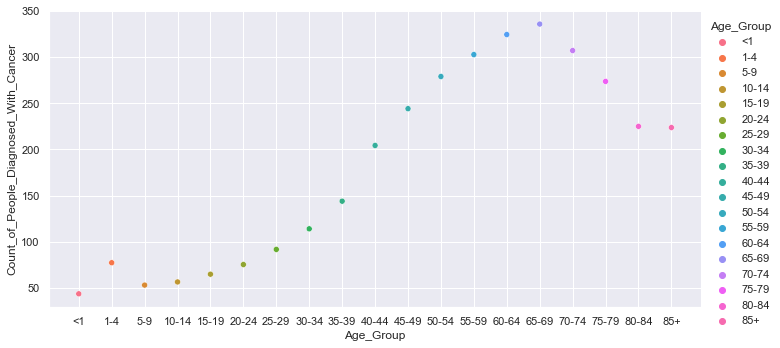

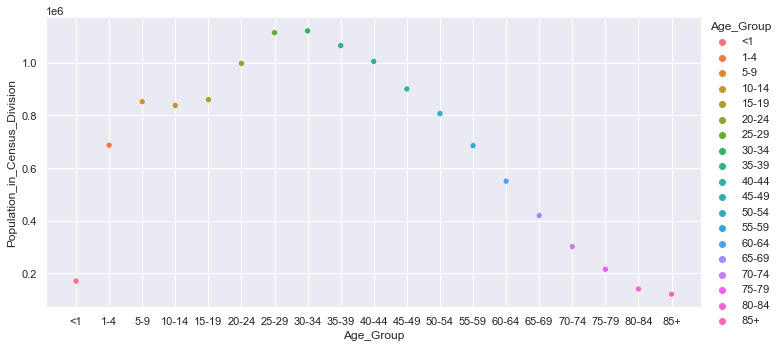

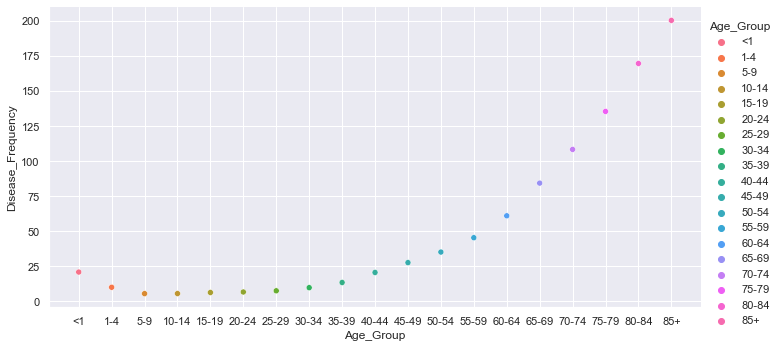

In [373]:
# Plotting the dataset asian_islander_by_age
sns.set_theme(style="darkgrid")
sns.relplot(x=asian_islander_by_age.index,
            y=asian_islander_by_age['Count_of_People_Diagnosed_With_Cancer'],
            data=asian_islander_by_age, hue=asian_islander_by_age.index,
            aspect=2
            )
sns.relplot(x=asian_islander_by_age.index,
            y=asian_islander_by_age['Population_in_Census_Division'],
            data=asian_islander_by_age, hue=asian_islander_by_age.index,
            aspect=2
            )
sns.relplot(x=asian_islander_by_age.index,
            y=asian_islander_by_age['Disease_Frequency'],
            data=asian_islander_by_age, hue=asian_islander_by_age.index,
            aspect=2)


I want to know how many persons have been diagnosed of cancer by age group.
I have filtered the age group and count of people diagnosed with cancer and assigned it to a new dataframe.

In [342]:
da=cancer_df[['Age_Group','Count_of_People_Diagnosed_With_Cancer']]
da=da.groupby(by='Age_Group').mean()
da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1-4 to <1
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Count_of_People_Diagnosed_With_Cancer  19 non-null     float64
dtypes: float64(1)
memory usage: 304.0+ bytes
